In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
# Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Configure the custom library path
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

print(module_path)
sys.path.insert(0, module_path)

d:\university\fisica-labs


In [52]:
# Import custom library
from lib import DataTable
from lib import CreateFigure

In [53]:
# Read the data
data_laton = pd.read_csv('./data/laton.csv', delimiter=',')
latonDataT1 = DataTable('Laton-T1', data_laton['T1'] - data_laton['T1'][0], data_laton['D'] / 100000)
latonDataT1.set_d(0.1, 1 / 100000)
latonDataT1.calc_d()
latonDataT1.calc_linear_regression()

data_cobre = pd.read_csv('./data/cobre.csv', delimiter=',')
cobreDataT1 = DataTable('Cobre-T1', data_cobre['T1'] - data_cobre['T1'][0], data_cobre['D'] / 100000)
cobreDataT1.set_d(0.1, 1 / 100000)
cobreDataT1.calc_d()
cobreDataT1.calc_linear_regression()

Cobre
Experimental: 1.8374340435772045e-05 +- 1.4117215787571673e-21
Teorico:  1.7e-05
Error:  8.084355504541442
[1.1024604261463227e-05, 3.8053519177341116e-06, 0.999686568470579]
(8.470329472543003e-22, 8.897539573853703e-06)
Laton
Experimental: 1.185348226228684e-05 +- 1.4117215787571673e-21
Teorico:  1.8e-05
Error:  34.14732076507311
[7.112089357372104e-06, 2.7018743647902607e-06, 0.9993856617065191]
(8.470329472543003e-22, 9.28879106426277e-06)


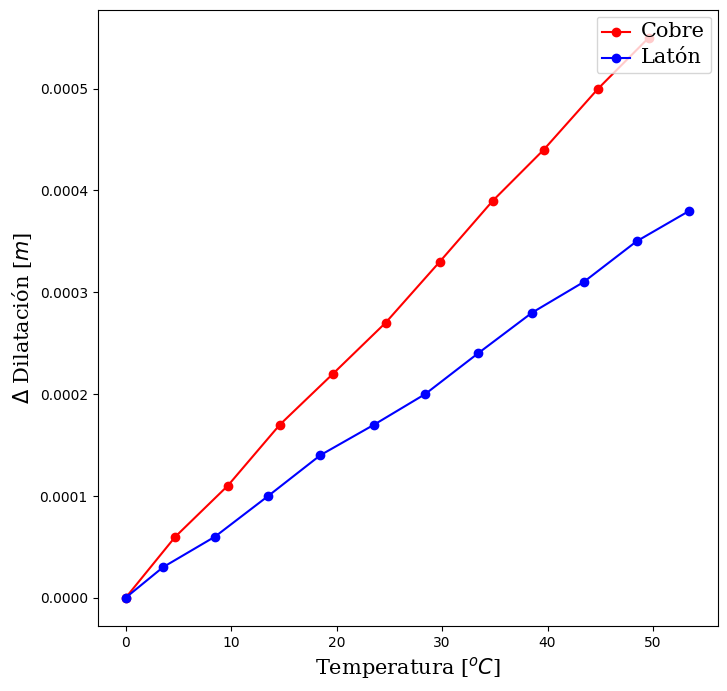

In [73]:
cobre = cobreDataT1.regress[0] / 0.6
laton = latonDataT1.regress[0] / 0.6

teorico_cobre = 1.7E-5
teorico_laton = 1.8E-5

error_cobre = abs(cobre - teorico_cobre) * 100/ teorico_cobre
error_laton = abs(laton - teorico_laton) * 100/ teorico_laton

print('Cobre')
print(f'Experimental: {cobre} +- {cobreDataT1.error[0] / 0.6}',)
print('Teorico: ', teorico_cobre)
print('Error: ', error_cobre)
print(cobreDataT1.regress)
print(cobreDataT1.error)

print('Laton')
print(f'Experimental: {laton} +- {latonDataT1.error[0] / 0.6}')
print('Teorico: ', teorico_laton)
print('Error: ', error_laton)
print(latonDataT1.regress)
print(latonDataT1.error)

test = CreateFigure()
test.p_create(8, 8)
test.p_plot(cobreDataT1.x, cobreDataT1.y, 'red', 'Cobre', '-o')
test.p_plot(latonDataT1.x, latonDataT1.y, 'blue', 'Latón', '-o')
test.p_xlabel('Temperatura [$^oC$]')
test.p_ylabel('$\Delta$ Dilatación [$m$]')
test.p_legend()
test.p_show()

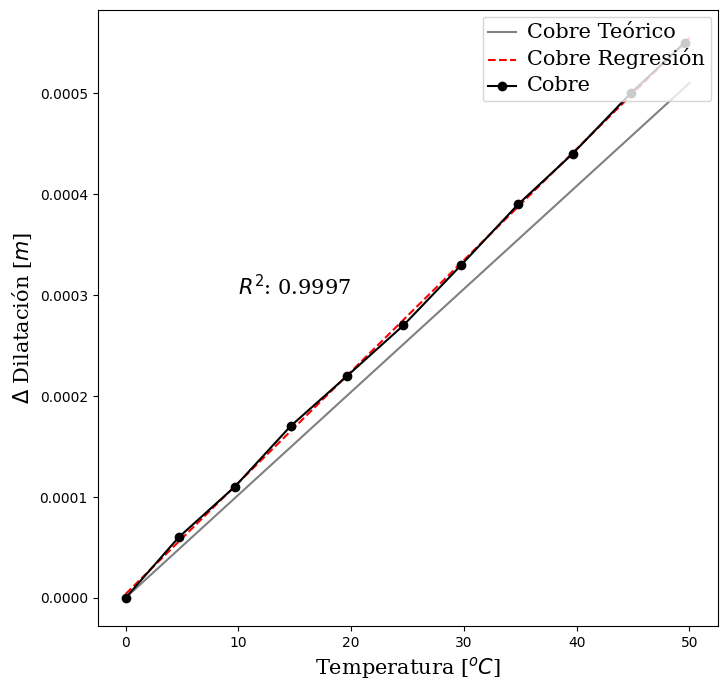

In [71]:
x_cobre_teorico = [cobreDataT1.x[0], 50]
y_cobre_teorico = [teorico_cobre * 0.6 * x_cobre_teorico[0], teorico_cobre * 0.6 * x_cobre_teorico[1]]
y_cobre_regress = [cobreDataT1.regress[0] * x_cobre_teorico[0] + cobreDataT1.regress[1], cobreDataT1.regress[0] * x_cobre_teorico[1] + cobreDataT1.regress[1]]

figure2 = CreateFigure()
figure2.p_create(8, 8)
figure2.p_plot(x_cobre_teorico, y_cobre_teorico, 'gray', 'Cobre Teórico', '-')
figure2.p_plot(x_cobre_teorico, y_cobre_regress, 'red', 'Cobre Regresión', '--')
figure2.p_plot(cobreDataT1.x, cobreDataT1.y, 'black', 'Cobre', '-o')
figure2.p_xlabel('Temperatura [$^oC$]')
figure2.p_ylabel('$\Delta$ Dilatación [$m$]')
figure2.p_add_text(f'$R^2$: {round(cobreDataT1.regress[2], 4)}', 10, 0.0003)
figure2.p_legend()
figure2.p_show()

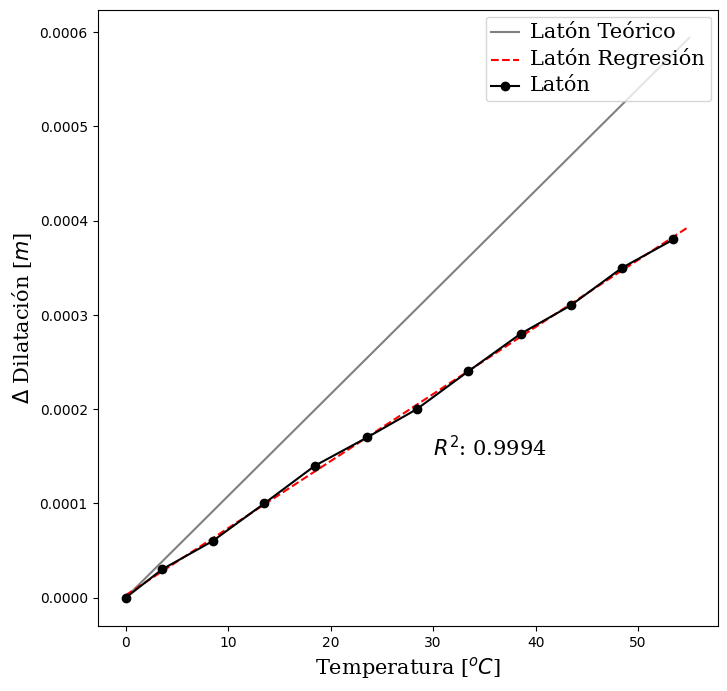

In [72]:
x_laton_teorico = [latonDataT1.x[0], 55]
y_laton_teorico = [teorico_laton * 0.6 * x_laton_teorico[0], teorico_laton * 0.6 * x_laton_teorico[1]]
y_laton_regress = [latonDataT1.regress[0] * x_laton_teorico[0] + latonDataT1.regress[1], latonDataT1.regress[0] * x_laton_teorico[1] + latonDataT1.regress[1]]

figure2.p_create(8, 8)
figure2.p_plot(x_laton_teorico, y_laton_teorico, 'gray', 'Latón Teórico', '-')
figure2.p_plot(x_laton_teorico, y_laton_regress, 'red', 'Latón Regresión', '--')
figure2.p_plot(latonDataT1.x, latonDataT1.y, 'black', 'Latón', '-o')
figure2.p_xlabel('Temperatura [$^oC$]')
figure2.p_ylabel('$\Delta$ Dilatación [$m$]')
figure2.p_add_text(f'$R^2$: {round(latonDataT1.regress[2], 4)}', 30, 0.00015)
figure2.p_legend()
figure2.p_show()